In [ ]:
#ok, so questions
#what animal and or breed is most likely to be picked up in a particular council district
#what animal and or breed is most likely to be put down in a particular council district
#what animal and or breed is most likely to be adopted in a particular council district
#how long does each type of animal stay impounded?
#is there an association by employee id and outcome?
#are there any particular types or breeds that get returned to owner?

In [355]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [35]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [39]:
def add_value_labels(ax, spacing=5, rot=45):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center', rotation=rot,                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
# add_value_labels(ax)


In [194]:
df = pd.read_excel('EDA Instructions and Data.xlsx', sheet_name=2)

In [4]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,6301,...,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,7102,...,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,4600,...,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,16605,...,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,6900,...,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020


In [5]:
df.sample(10)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
12988,A1092643,CAT,DOMESTIC SH,LFC 045,AVAILABLE,NaN,A20-208374,1,P0914397,4201,...,09:25:00,NaN,K20-493279,NaN,APP WNL,SCAN NO CHIP,FIELD,NaN,JAN.2020,FY2020
17323,A1095883,CAT,DOMESTIC SH,LFC 012,UNAVAILABLE,NaN,NaN,1,P0918688,7202,...,09:25:00,NaN,K20-497702,NaN,APP INJ,SCAN NO CHIP,OVER THE COUNTER,NaN,FEB.2020,FY2020
7649,A1089231,DOG,CHIHUAHUA LH,CC 04,IMPOUNDED,NaN,NaN,1,P0908940,10101,...,16:36:00,R19-559668,K19-488587,NaN,APP WNL,SCAN NO CHIP,OVER THE COUNTER,PRE-ADOPTED,NOV.2019,FY2020
14998,A1094389,DOG,PIT BULL,RECEIVING,IMPOUNDED,NaN,A20-211049,1,P9991704,8500,...,11:57:00,NaN,K20-495731,NaN,APP WNL,SCAN CHIP,SWEEP,NaN,JAN.2020,FY2020
3726,A1085307,DOG,GERM SHEPHERD,RECEIVING,IMPOUNDED,NaN,A19-196772,1,P9991765,16701,...,17:45:00,NaN,K19-483304,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,OCT.2019,FY2020
6310,A1087804,DOG,SCHNAUZER MIN,DC 03,UNAVAILABLE,NaN,A19-200410,1,P9991781,2500,...,15:55:00,R19-558675,K19-486606,NaN,APP WNL,SCAN CHIP,FIELD,RETURNED TO OWNER ; SX 11/09/19,NOV.2019,FY2020
14322,A1095472,DOG,POMERANIAN,LOST,IMPOUNDED,NaN,NaN,0,P0918101,NaN,...,00:00:00,NaN,K20-497165,NaN,NaN,NaN,NaN,NaN,FEB.2020,FY2020
11196,A1091902,DOG,YORKSHIRE TERR,RECEIVING,IMPOUNDED,NaN,A19-207322,1,P9991778,8703,...,15:13:00,NaN,K19-492222,NaN,UNKNOWN,SCAN NO CHIP,FIELD,NaN,DEC.2019,FY2020
14545,A1095515,CAT,DOMESTIC SH,AC 027,UNAVAILABLE,NaN,NaN,1,P0549189,9103,...,15:23:00,R20-564318,K20-497215,NaN,APP WNL,UNABLE TO SCAN,OVER THE COUNTER,JEJ,FEB.2020,FY2020
18165,A1096418,DOG,PIT BULL,INJD 007,IMPOUNDED,NaN,NaN,1,P0818887,500,...,17:43:00,NaN,K20-498380,NaN,APP INJ,SCAN NO CHIP,OVER THE COUNTER,NaN,FEB.2020,FY2020


In [6]:
html_str_output = pandas_profiling.ProfileReport(df)
html_str_output

In [7]:
#First let's investigate the columns that are messed up.
#Tag Type, Census Tract, Council District, Staff ID, Service Request Number, Addtional Information, Year

In [10]:
df['Tag Type'].value_counts(dropna = False)

NaN    22557
Name: Tag Type, dtype: int64

In [11]:
#ok, we can get rid of tag type

In [12]:
df['Census Tract'].value_counts(dropna = False)

20500.0    3684
NaN        2758
11900.0     241
11602.0     237
17102.0     236
           ... 
31804.0       1
14127.0       1
15800.0       1
13104.0       1
13727.0       1
Name: Census Tract, Length: 312, dtype: int64

In [13]:
#lot of Nans, but should we keep it?

In [15]:
df['Council District'].value_counts(dropna=False)

6      5158
NaN    2758
4      2404
8      2238
5      2069
7      1609
1      1436
3      1413
2       869
9       751
10      456
14      392
13      392
11      347
12      250
0        11
AS        4
Name: Council District, dtype: int64

In [16]:
#this one seems useful.  same Nans as census tract, but better filled and simpler

In [18]:
df['Staff Id'].value_counts(dropna = False)

CDM        1334
WEB        1328
DL         1053
CBU         931
BW          854
           ... 
BBB8448       1
AAK1780       1
RY1776        1
BCD1779       1
ACO           1
Name: Staff Id, Length: 490, dtype: int64

In [19]:
#this is interesting.  we should keep this, there is some serious overrepresentation of staffIDs here.
#maybe we can explore correlations between outcome types and staff ID

In [21]:
df['Service Request Number'].value_counts(dropna = False)

NaN                22501
2000087228            36
982126057960114        2
1901377000             2
15-00091153            2
1901-242798            2
2000427938             1
1901329295             1
2000280489             1
1901457301             1
982126057679937        1
2000144038             1
`                      1
1901262130             1
1901216914             1
2000264650             1
2000454003             1
1901457372             1
Name: Service Request Number, dtype: int64

In [22]:
#this may not be worth keeping.  No revealing information and way too many NANs to track

In [24]:
df['Additional Information'].value_counts(dropna= False)

NaN                              13320
ADOPTED                           2426
FOSTER                            1142
TAGGED                             831
RETURNED TO OWNER                  668
                                 ...  
SRM1774                              1
HWT 2&3/INJD 8A                      1
RETURNED TO OWNER SX 01/30/20        1
RETURNED TO OWNER SX 01/13/20        1
RETURNED TO OWNERSX11/11             1
Name: Additional Information, Length: 1023, dtype: int64

In [25]:
#this seems similar to Outcome, may need to investigate further, but it may be superfluous

In [26]:
df['Year'].value_counts(dropna=False)

FY2020    22557
Name: Year, dtype: int64

In [27]:
#unremarkable, can drop.

In [28]:
#we can certainly drop Tag Type and Year.


In [195]:
df = df.drop(columns = ['Tag Type'])

In [196]:
df = df.drop(columns = ['Year'])

In [197]:
df = df.loc[df['Animal Type'].isin(['DOG', 'CAT'])]

In [198]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,1,P0098773,6301,4,OWNER SURRENDER,GENERAL,1,PERSNLISSU,CDM,2019-11-08,15:48:00,2019-11-14,APP SICK,NaN,RETURNED TO OWNER,WALK IN,2019-11-09,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,1,P0492284,7102,2,OWNER SURRENDER,DEAD ON ARRIVAL,1,OTHRINTAKS,CDM,2019-11-10,14:18:00,2019-11-10,DEAD,NaN,DEAD ON ARRIVAL,DISPOSAL,2019-11-10,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,A19-195601,1,P9991718,4600,1,STRAY,AT LARGE,1,OTHER,MG1718,2019-10-03,11:08:00,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-10-03,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,A19-196573,1,P0903792,16605,8,OWNER SURRENDER,GENERAL,1,OTHER,RA 1549,2019-10-11,09:55:00,2019-10-17,TREATABLE REHABILITABLE NON-CONTAGIOUS,EMERGENCY RESCUE,TRANSFER,MEDICAL-CONTAGIOUS,2019-10-15,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,1,P0890077,6900,1,STRAY,AT LARGE,1,OTHRINTAKS,JR,2019-11-08,11:55:00,2019-11-14,APP WNL,RESCU ONLY,RETURNED TO OWNER,WALK IN,2019-11-09,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019


In [199]:
de = df[~df['Council District'].isin(['AS', 0])]

In [200]:
de['Council District'].value_counts()


6     5064
4     2346
8     2200
5     2031
7     1562
1     1397
3     1381
2      829
9      629
10     403
13     355
14     340
11     274
12     204
Name: Council District, dtype: int64

<AxesSubplot:xlabel='Animal Type', ylabel='count'>

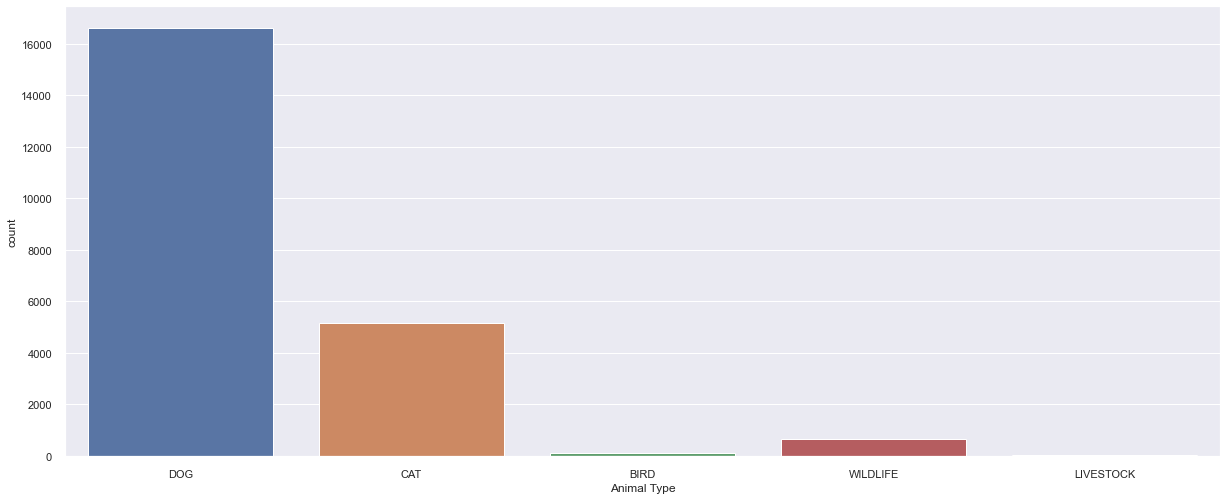

In [36]:
sns.countplot(df['Animal Type'])

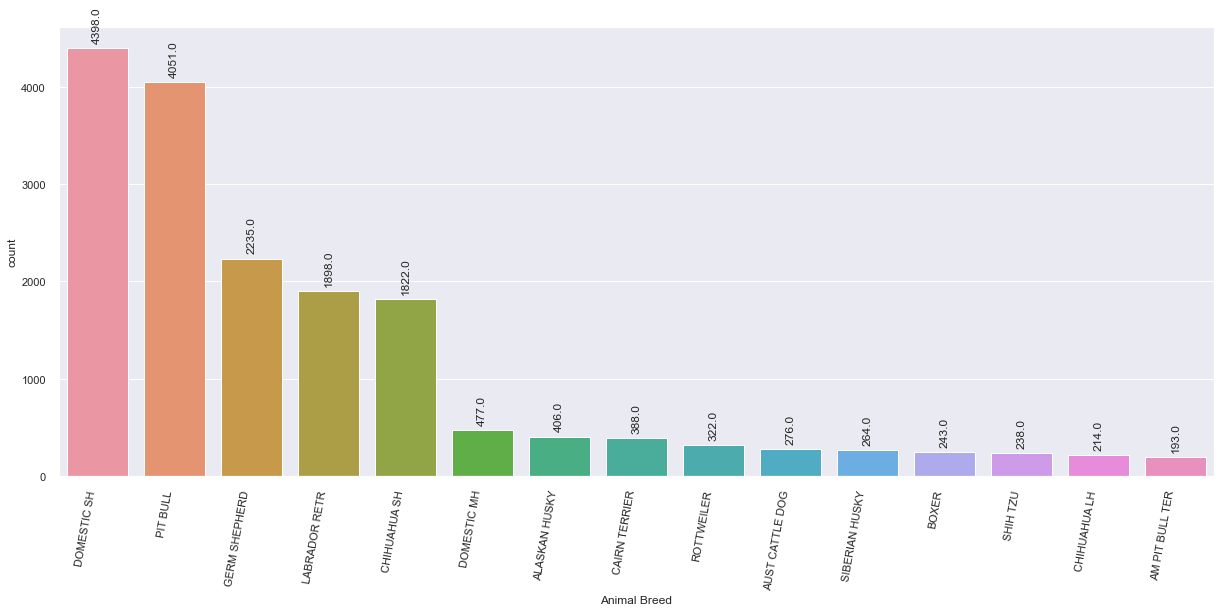

In [201]:
ax = sns.countplot(df['Animal Breed'], order=df['Animal Breed'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

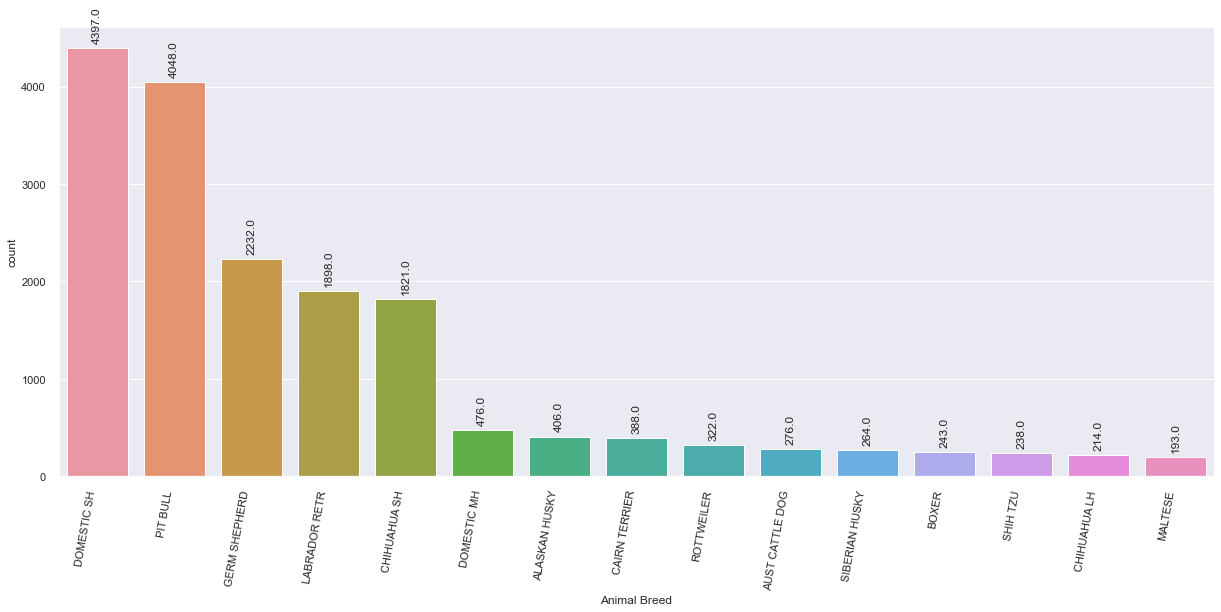

In [202]:
ax = sns.countplot(de['Animal Breed'], order=de['Animal Breed'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

<AxesSubplot:xlabel='Council District', ylabel='count'>

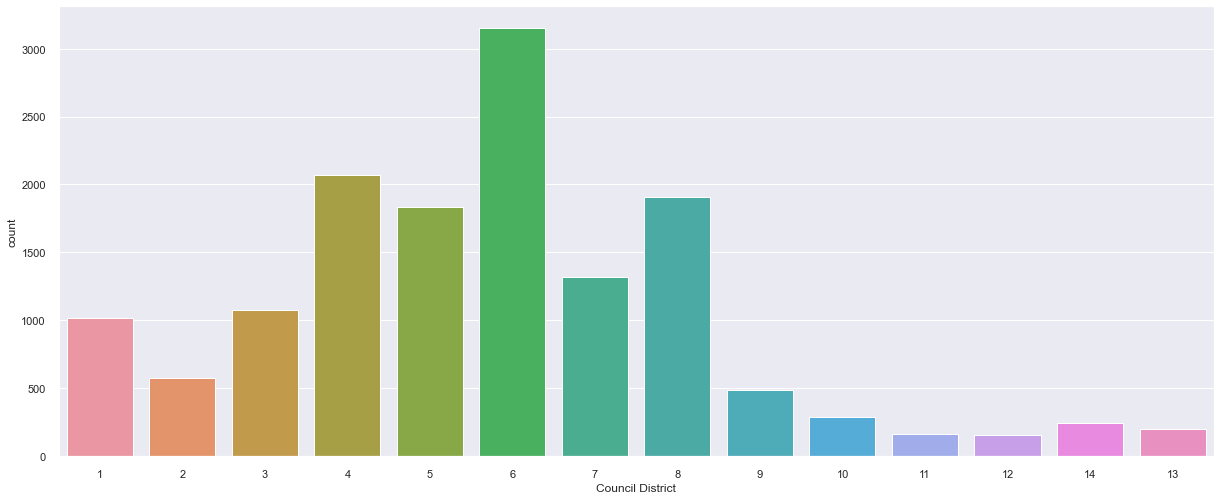

In [171]:
sns.countplot(de['Council District'])

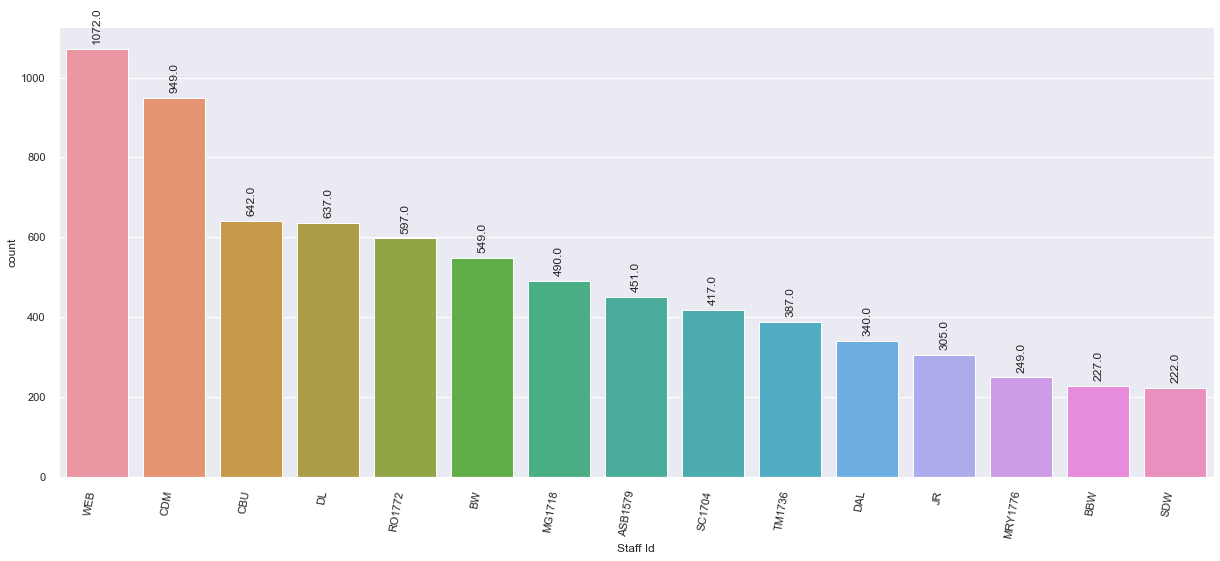

In [172]:
ax = sns.countplot(de['Staff Id'], order=de['Staff Id'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

<AxesSubplot:xlabel='Month', ylabel='count'>

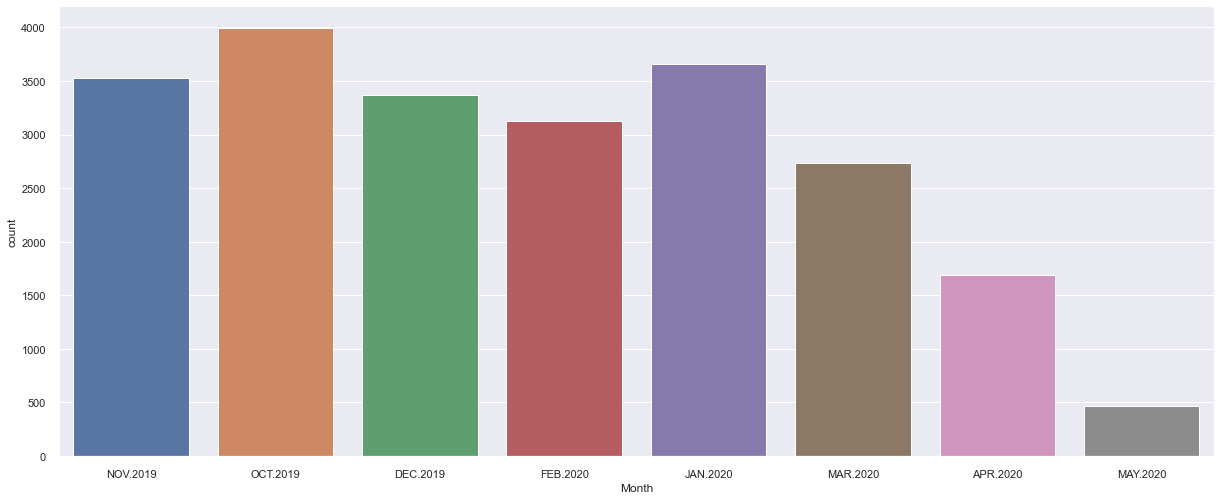

In [50]:
sns.countplot(df['Month'])

In [ ]:
#month does not seem particularly important, too small of a sample size to judge trends

In [203]:
de.loc[df['Receipt Number'] == 'R19-560515']

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
10428,A1090325,CAT,DOMESTIC SH,F2,AVAILABLE,NaN,1,P0893338,20500,6,FOSTER,TREATMENT,1,OTHER,AC,2019-12-22,10:18:00,2019-12-22,APP SICK,RESC FOSTR,EUTHANIZED,HUMANE,2019-12-22,11:58:00,R19-560515,K19-491684,NaN,APP SICK,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2019
10913,A1090325,CAT,DOMESTIC SH,K13,UNAVAILABLE,NaN,1,P0843333,9611,13,STRAY,AT LARGE,1,OTHRINTAKS,CBU,2019-12-07,14:24:00,2019-12-07,APP SICK,RESC FOSTR,FOSTER,UNDERAGE,2019-12-09,16:36:00,R19-560515,K19-490066,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019
10923,A1090322,CAT,DOMESTIC SH,K13,UNAVAILABLE,NaN,1,P0843333,9611,13,STRAY,AT LARGE,1,OTHRINTAKS,CBU,2019-12-07,14:24:00,2019-12-07,APP WNL,RESC FOSTR,FOSTER,UNDERAGE,2019-12-09,16:35:00,R19-560515,K19-490063,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019
10960,A1090323,CAT,DOMESTIC SH,K13,UNAVAILABLE,NaN,1,P0843333,9611,13,STRAY,AT LARGE,1,OTHRINTAKS,CBU,2019-12-07,14:24:00,2019-12-07,APP WNL,RESC FOSTR,FOSTER,UNDERAGE,2019-12-09,16:35:00,R19-560515,K19-490065,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019
11019,A1090321,CAT,DOMESTIC SH,FOSTER,UNAVAILABLE,NaN,1,P0843333,9611,13,STRAY,AT LARGE,1,OTHRINTAKS,CBU,2019-12-07,14:24:00,2019-12-07,APP WNL,RESC FOSTR,FOSTER,UNDERAGE,2019-12-09,16:34:00,R19-560515,K19-490062,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019


In [ ]:
#there are duplicates for recipt number, is this relevant or an error?

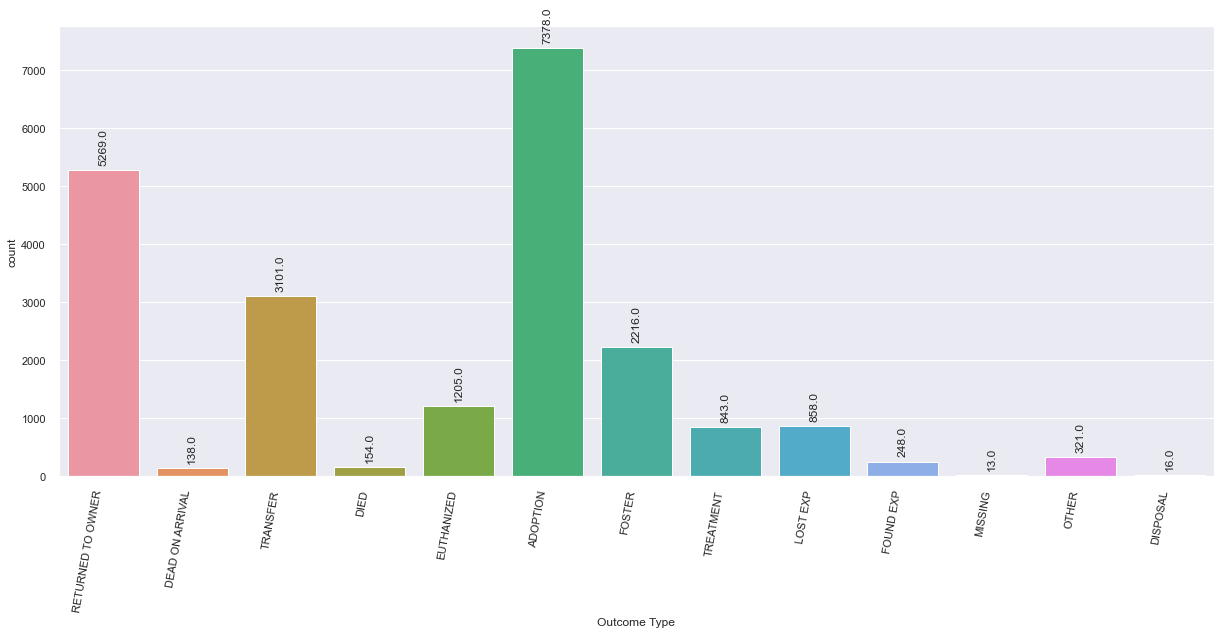

In [204]:
ax = sns.countplot(df['Outcome Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

In [58]:
council1 = df.loc[df['Council District'] == 1]

In [84]:
council1.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,...,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,A19-195601,1,P9991718,4600,1,...,2019-10-03,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,1,P0890077,6900,1,...,2019-11-09,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019
33,A0706302,DOG,DACHSHUND,RECEIVING,IMPOUNDED,A19-197003,1,P9991723,6200,1,...,2019-10-15,08:59:00,NaN,K19-483571,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,OCT.2019
46,A0747126,DOG,SIBERIAN HUSKY,RECEIVING,UNAVAILABLE,A19-199722,1,P9991721,6200,1,...,2019-11-02,15:25:00,NaN,K19-486006,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,SWEEP,NaN,NOV.2019
57,A0763188,DOG,GERM SHEPHERD,LFD 042,IMPOUNDED,NaN,1,P0905706,4700,1,...,2019-10-28,11:37:00,R19-558018,K19-485155,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,OCT.2019


In [208]:
CDM = df.loc[df["Staff Id"] == 'CDM']

In [209]:
CDM['Animal Type'].value_counts()

DOG    949
CAT    370
Name: Animal Type, dtype: int64

In [210]:
web = df.loc[df['Staff Id'] == 'WEB']

In [211]:
web.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
260,A1097474,DOG,CHIHUAHUA SH,LOST,IMPOUNDED,NaN,0,P0920776,NaN,NaN,STRAY,WEB,1,NaN,WEB,2020-03-01,13:25:00,2020-03-03,NORMAL,NaN,LOST EXP,OTHER,2020-04-03,00:00:00,NaN,K20-499774,NaN,NaN,NaN,NaN,NaN,MAR.2020
347,A1089226,DOG,LABRADOR RETR,FOUND,IMPOUNDED,NaN,0,P0908929,NaN,NaN,STRAY,WEB,1,NaN,WEB,2019-11-23,14:25:00,2019-11-23,NORMAL,NaN,FOUND EXP,OTHER,2019-12-24,00:00:00,NaN,K19-488577,NaN,NaN,NaN,NaN,NaN,NOV.2019
715,A1090041,CAT,AMER SH,LOST,IMPOUNDED,NaN,0,P0910264,NaN,NaN,STRAY,WEB,1,NaN,WEB,2019-11-27,12:25:00,2019-12-04,NORMAL,NaN,LOST EXP,OTHER,2020-01-04,00:00:00,NaN,K19-489684,NaN,NaN,NaN,NaN,NaN,NOV.2019
803,A1092513,CAT,ABYSSINIAN,LOST,IMPOUNDED,NaN,0,P0914189,NaN,NaN,STRAY,WEB,1,NaN,WEB,2020-01-03,13:25:00,2020-01-04,NORMAL,NaN,LOST EXP,OTHER,2020-02-04,00:00:00,NaN,K20-493070,NaN,NaN,NaN,NaN,NaN,JAN.2020
955,A1089178,DOG,OLDENG SHEEPDOG,LOST,IMPOUNDED,NaN,0,P0908863,NaN,NaN,STRAY,WEB,1,NaN,WEB,2019-11-22,08:25:00,2019-11-23,NORMAL,NaN,LOST EXP,OTHER,2019-12-24,00:00:00,NaN,K19-488501,NaN,NaN,NaN,NaN,NaN,NOV.2019


In [212]:
web['Animal Type'].value_counts()

DOG    1072
CAT     242
Name: Animal Type, dtype: int64

In [213]:
web['Council District'].value_counts()

Series([], Name: Council District, dtype: int64)

In [214]:
dl = df.loc[df['Staff Id'] == 'DL']

In [215]:
dl.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
9,A0601180,DOG,COLLIE SMOOTH,LFD 076,IMPOUNDED,NaN,1,P0584572,11002,4,OWNER SURRENDER,RETURN30,1,MEDICAL,DL,2019-11-06,11:53:00,2019-11-06,APP WNL,NaN,EUTHANIZED,HUMANE,2019-11-06,12:59:00,NaN,K19-486443,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019
24,A0690416,DOG,FOX TERR WIRE,LFD 082,IMPOUNDED,NaN,1,P0542160,20500,6,TRANSFER,OTHER,1,OTHRINTAKS,DL,2019-10-22,13:13:00,2019-10-28,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,WALK IN,2019-10-22,16:54:00,R19-557720,K19-484531,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,OCT.2019
25,A0692158,DOG,BOXER,LFD 097,UNAVAILABLE,NaN,1,P0593521,20500,6,OWNER SURRENDER,GENERAL,1,PERSNLISSU,DL,2019-10-12,15:47:00,2019-10-12,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOP RESCU,ADOPTION,WALK IN,2019-10-16,14:41:00,R19-557358,K19-483279,NaN,HEALTHY,SCAN CHIP,OVER THE COUNTER,ADOPTED,OCT.2019
26,A0692158,DOG,BOXER,VIP27,UNAVAILABLE,NaN,1,P0904417,20500,6,OWNER SURRENDER,GENERAL,1,NOTRIGHTFT,DL,2019-11-16,11:14:00,2019-11-16,APP WNL,ADOP RESCU,ADOPTION,WALK IN,2019-11-16,15:40:00,R19-559180,K19-487675,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,ADOPTED,NOV.2019
36,A0716512,CAT,DOMESTIC SH,VT 11,IMPOUNDED,NaN,1,P0584727,13005,10,OWNER SURRENDER,GENERAL,1,PERSNLISSU,DL,2019-10-23,11:21:00,2019-10-29,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,EUTHANIZED,MEDICAL-NONCONTAGIOUS,2019-10-24,09:15:00,NaN,K19-484655,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2019


In [216]:
dl['Council District'].value_counts()

6     273
1     125
4     112
3     103
8      90
2      67
7      45
13     41
5      38
10     36
9      32
12     26
11     22
14     21
Name: Council District, dtype: int64

In [217]:
dl['Animal Type'].value_counts()

DOG    637
CAT    394
Name: Animal Type, dtype: int64

In [218]:
ro = df.loc[df['Staff Id'] == 'RO1772']

In [219]:
ro.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
17,A0651053,DOG,CHIHUAHUA SH,RECEIVING,IMPOUNDED,A19-196432,1,P9991772,10000,2,STRAY,AT LARGE,1,OTHER,RO1772,2019-10-10,07:55:00,2019-10-10,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-10-10,07:56:00,NaN,K19-482941,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,NaN,OCT.2019
51,A0752089,DOG,PIT BULL,RECEIVING,IMPOUNDED,A19-205382,1,P9991772,9303,5,STRAY,AT LARGE,1,OTHER,RO1772,2019-12-12,12:55:00,2019-12-12,APP WNL,NaN,RETURNED TO OWNER,FIELD,2019-12-12,12:56:00,NaN,K19-490634,NaN,APP WNL,SCAN CHIP,SWEEP,NaN,DEC.2019
66,A0775269,DOG,LABRADOR RETR,RECEIVING,IMPOUNDED,A19-204183,1,P9991772,8500,5,STRAY,AT LARGE,1,OTHER,RO1772,2019-12-04,13:23:00,2019-12-04,APP WNL,NaN,RETURNED TO OWNER,FIELD,2019-12-04,13:24:00,NaN,K19-489703,NaN,APP WNL,UNABLE TO SCAN,SWEEP,NaN,DEC.2019
82,A0820528,DOG,GERM SHEPHERD,AD 009,UNAVAILABLE,A19-203409,1,P9991772,3800,7,STRAY,AT LARGE,1,OTHER,RO1772,2019-11-30,11:44:00,2019-12-02,APP WNL,ADOP RESCU,ADOPTION,OFFSITE,2019-12-10,14:34:00,R19-560701,K19-489233,NaN,APP WNL,SCAN CHIP,SWEEP,GALLERIA,NOV.2019
91,A1089617,DOG,GERM SHEPHERD,AD 070,UNAVAILABLE,A19-203300,1,P9991772,10101,6,STRAY,AT LARGE,1,OTHER,RO1772,2019-11-29,07:32:00,2019-12-03,APP WNL,ADOP RESCU,ADOPTION,WALK IN,2019-12-29,11:37:00,R19-561804,K19-489107,NaN,APP WNL,UNABLE TO SCAN,SWEEP,ADOPTED,NOV.2019


In [220]:
ro['Council District'].value_counts()

4     136
5     111
6     102
7      94
8      80
3      20
1      20
2      18
9       7
13      6
14      1
11      1
10      1
Name: Council District, dtype: int64

In [ ]:
#ok so employee number is unreliable.

In [85]:
council1?

In [230]:
c1 = df.loc[df['Council District'] == 1]

In [231]:
c2 = df.loc[df['Council District'] == 2]

In [232]:
c3 = df.loc[df['Council District'] == 3]

In [233]:
c4 = df.loc[df['Council District'] == 4]

In [234]:
c5 = df.loc[df['Council District'] == 5]

In [235]:
c6 = df.loc[df['Council District'] == 6]

In [236]:
c7 = df.loc[df['Council District'] == 7]

In [237]:
c8 = df.loc[df['Council District'] == 8]

In [238]:
c9 = df.loc[df['Council District'] == 9]

In [239]:
c10 = df.loc[df['Council District'] == 10]

In [240]:
c11 = df.loc[df['Council District'] == 11]

In [241]:
c12 = df.loc[df['Council District'] == 12]

In [242]:
c13 = df.loc[df['Council District'] == 13]

In [243]:
c14 = df.loc[df['Council District'] == 14]

<AxesSubplot:xlabel='Council District', ylabel='count'>

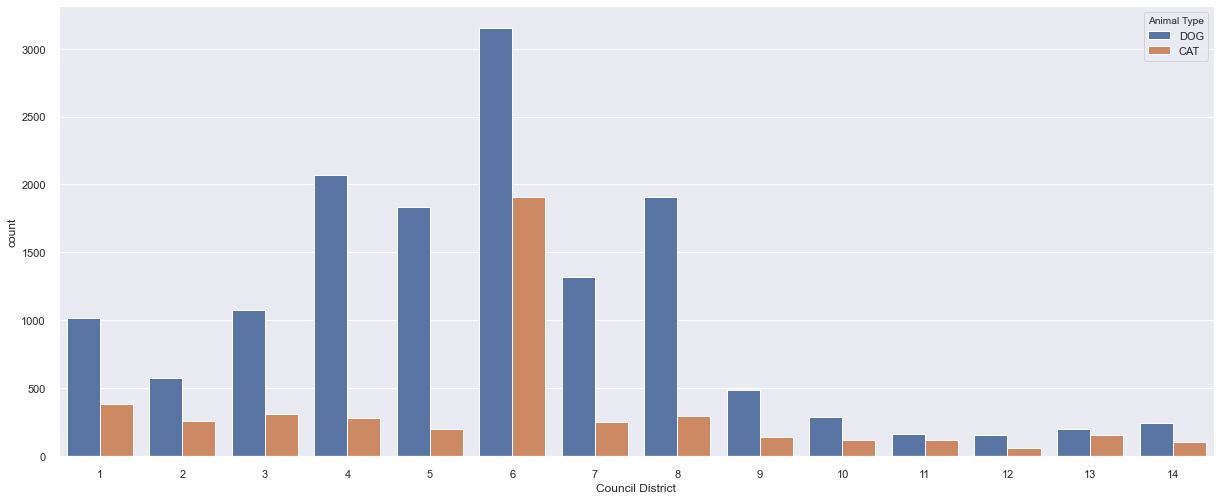

In [221]:
sns.countplot(data = de, x = 'Council District', hue='Animal Type')

In [ ]:
#district 6 not only has more animal impounds than any other, but more cats than any others.

<AxesSubplot:xlabel='Council District', ylabel='count'>

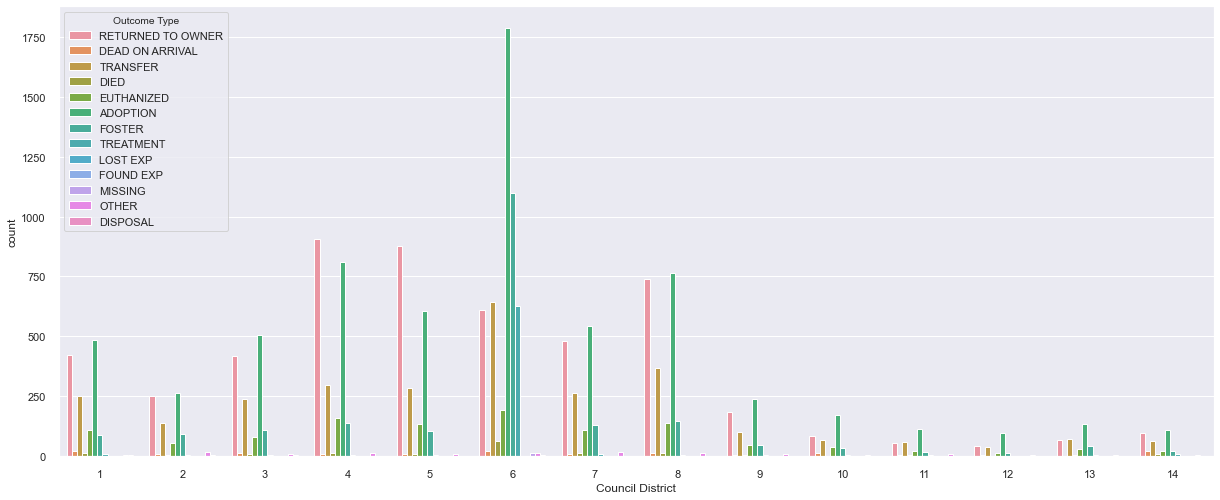

In [222]:
sns.countplot(data=de, x = 'Council District', hue = 'Outcome Type')

In [ ]:
#council 6 has the most animal impounds, but also has a high number of adoptions.
#What are the adoption rates per district?

In [ ]:
#i need to find the number of animals that 6 has received, and then divide by adoption outcomes....

In [ ]:
#Also, do i want to get rid of other types of animals?  Yeah, they're not significant

In [120]:
df = df[(df['Animal Type'] == 'Dog') & (df['Animal Type'] == 'Cat')]

In [124]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,...,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month


In [ ]:
#how to get there
#separate entries by council district, there appear to be 14
#get countplots of them



### Council District 1

In [244]:
c1.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,A19-195601,1,P9991718,4600,1,STRAY,AT LARGE,1,OTHER,MG1718,2019-10-03,11:08:00,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-10-03,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,1,P0890077,6900,1,STRAY,AT LARGE,1,OTHRINTAKS,JR,2019-11-08,11:55:00,2019-11-14,APP WNL,RESCU ONLY,RETURNED TO OWNER,WALK IN,2019-11-09,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019
33,A0706302,DOG,DACHSHUND,RECEIVING,IMPOUNDED,A19-197003,1,P9991723,6200,1,STRAY,CONFINED,1,OTHRINTAKS,MW1723,2019-10-15,08:30:00,2019-10-21,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-10-15,08:59:00,NaN,K19-483571,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,OCT.2019
46,A0747126,DOG,SIBERIAN HUSKY,RECEIVING,UNAVAILABLE,A19-199722,1,P9991721,6200,1,STRAY,AT LARGE,1,OTHER,MG1718,2019-11-02,15:24:00,2019-11-02,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-11-02,15:25:00,NaN,K19-486006,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,SWEEP,NaN,NOV.2019
57,A0763188,DOG,GERM SHEPHERD,LFD 042,IMPOUNDED,NaN,1,P0905706,4700,1,STRAY,AT LARGE,1,OTHRINTAKS,CDM,2019-10-27,10:55:00,2019-11-02,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,WALK IN,2019-10-28,11:37:00,R19-558018,K19-485155,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,OCT.2019


In [260]:
d = c1.shape[0]

In [282]:
d?

In [267]:
c = d[0]

TypeError: 'int' object is not subscriptable

In [291]:
a = c1['Outcome Type'].value_counts()

In [380]:
def runpercs(ant):
    tots = {}
    dogs = {}    
    cats = {}
    
    
    dog = ant[ant['Animal Type'] == 'DOG']
    cat = ant[ant['Animal Type'] == 'CAT']
    vals = ant['Outcome Type'].value_counts()
    valdog = dog['Outcome Type'].value_counts()
    valcat = cat['Outcome Type'].value_counts()
    
    num = ant.shape[0]
    numdog = dog.shape[0]
    numcat = cat.shape[0]
    for index, value in vals.items():
        tots.update({index:round(value/num, 3)})
    for index, value in valdog.items():
        dogs.update({index:round(value/numdog, 3)})
    for index, value in valcat.items():
        cats.update({index:round(value/numcat, 3)})
        
    return tots, dogs, cats

In [ ]:
def runpercs(ant):
    tots = []
    dogs = []    
    cats = []
    
    
    dog = ant[ant['Animal Type'] == 'DOG']
    cat = ant[ant['Animal Type'] == 'CAT']
    vals = ant['Outcome Type'].value_counts()
    valdog = dog['Outcome Type'].value_counts()
    valcat = cat['Outcome Type'].value_counts()
    
    num = ant.shape[0]
    numdog = dog.shape[0]
    numcat = cat.shape[0]
    df = pd.DataFrame([],columns = ('Adoption', 
                        'Returned_to_Owner', 
                        'Transfer', 
                        'Euthanized', 
                        'Foster', 
                        'Dead_On_Arrival'
                        'Died',
                        'Treatement'
                        'Disposal'
                        'Other',
                        'Missing')
    
    df = df.set_index([pd.Index(['Total', 'Dog', 'Cat'])])                  
    for index, value in vals.items():
        tots.append(value/num)
    for index, value in valdog.items():
        dogs.append(value/numdog)
    for index, value in valcat.items():
        cats.append(value/numcat)
    tots = pd.DataFrame(columns = ('Adoption', 
                        'Returned_to_Owner', 
                        'Transfer', 
                        'Euthanized', 
                        'Foster', 
                        'Dead_On_Arrival'
                        'Died',
                        'Treatement'
                        'Disposal'
                        'Other',
                        'Missing')
        
    return tots, dogs, cats

In [448]:
ar = pd.DataFrame([],columns = ('Adoption', 
                        'Returned_to_Owner', 
                        'Transfer', 
                        'Euthanized', 
                        'Foster', 
                        'Dead_On_Arrival',
                        'Died',
                        'Treatement',
                        'Disposal',
                        'Other',
                        'Missing'))


In [452]:
ar = ar.reset_index()

In [453]:
ar = ar.index

,index,Adoption,Returned_to_Owner,Transfer,Euthanized,Foster,Dead_On_Arrival,Died,Treatement,Disposal,Other,Missing


In [ ]:
#what am i trying to do here.  I'm trying to get percentages and store them in a dataframe.

In [381]:
total, dogs, cats = runpercs(c1)

In [440]:
ga = pd.DataFrame.from_dict(total, orient='columns')

ValueError: If using all scalar values, you must pass an index

In [439]:
ga.head()

,0
ADOPTION,0.346
RETURNED TO OWNER,0.301
TRANSFER,0.180
EUTHANIZED,0.077
FOSTER,0.063


In [378]:
total

{'ADOPTION': 0.346,
 'RETURNED TO OWNER': 0.301,
 'TRANSFER': 0.18,
 'EUTHANIZED': 0.077,
 'FOSTER': 0.063,
 'DEAD ON ARRIVAL': 0.013,
 'DIED': 0.008,
 'TREATMENT': 0.006,
 'DISPOSAL': 0.003,
 'OTHER': 0.003,
 'MISSING': 0.001}

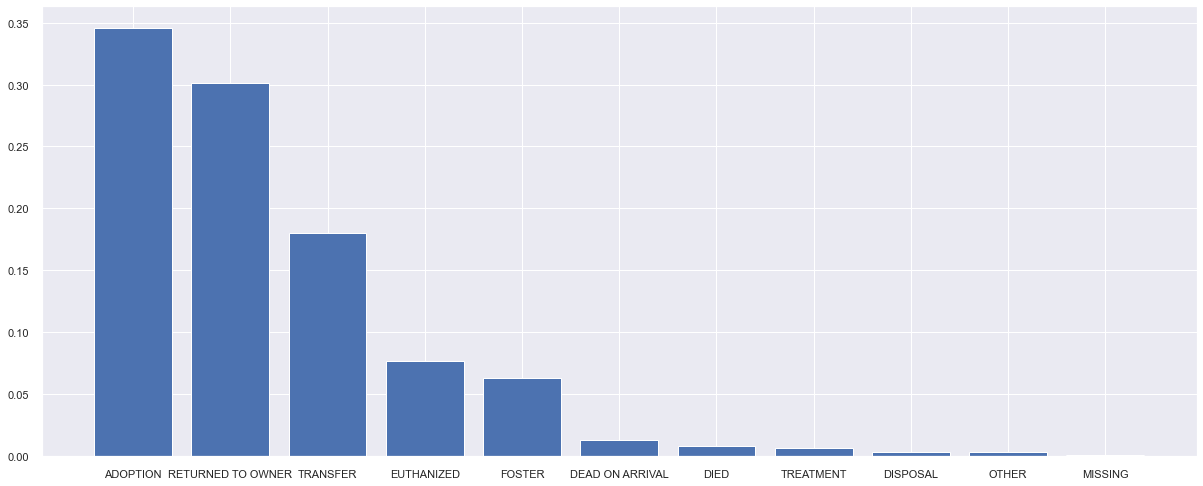

In [401]:
plt.bar(*zip(*total.items()))
plt.show()

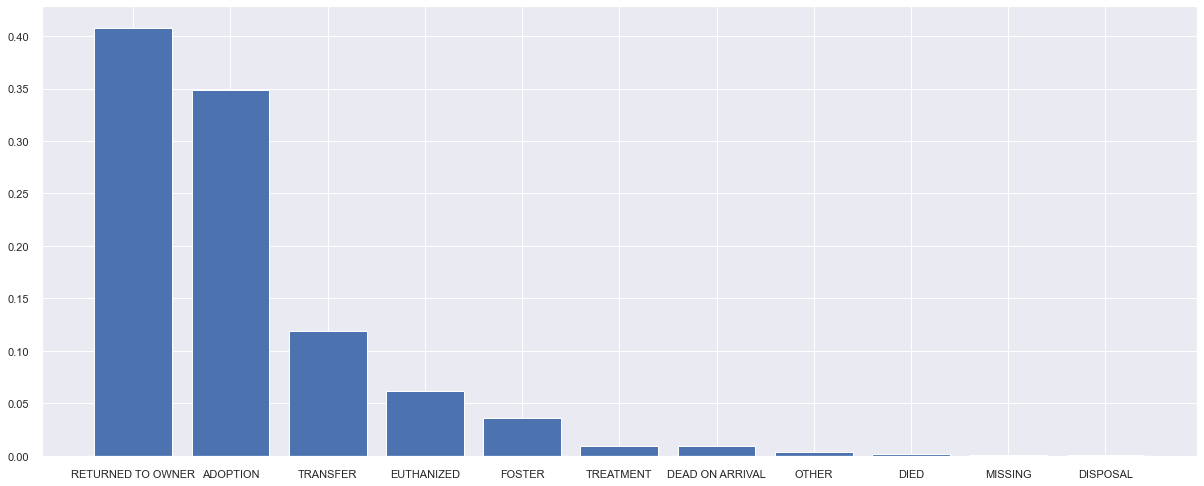

In [403]:
plt.bar(*zip(*dogs.items()))
plt.show()

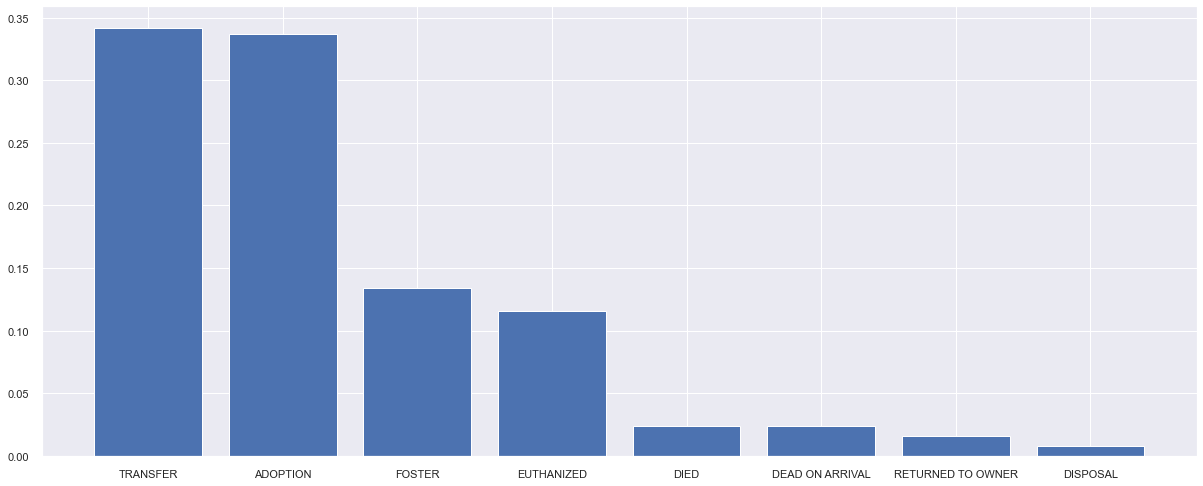

In [404]:
plt.bar(*zip(*cats.items()))
plt.show()

In [406]:
fig, (ax1, ax2) = plt.subplots(1,1 figsize=(12,5))

ax1.bar(total.keys(), total.values(), width=0.2, align='edge', label='Total')
ax1.bar(dogs.keys(), dogs.values(), width=-0.2, align='edge', label='Dogs')
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
# add_value_labels(ax1, rot=90)
ax1.legend()

ax2.bar(total.keys(), total.values(), width=0.4, align='center', label='A')
ax2.bar(dogs.keys(), dogs.values(), bottom=[total[i] for i in dogs.keys()], width=0.4, align='center', label='B')

ax2.legend()

fig.show()

SyntaxError: invalid syntax (<ipython-input-406-7f2335ab0dc2>, line 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


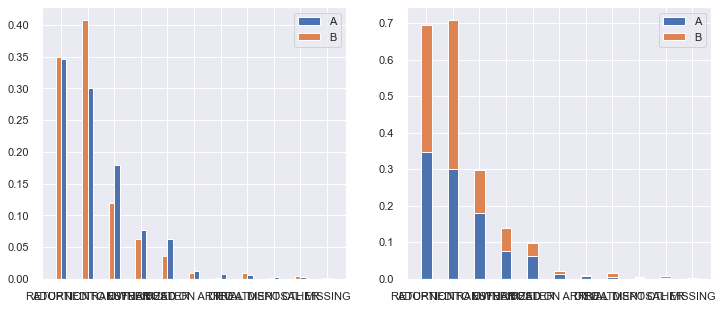

In [407]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.bar(total.keys(), total.values(), width=0.2, align='edge', label='A')
ax1.bar(dogs.keys(), dogs.values(), width=-0.2, align='edge', label='B')

ax1.legend()

ax2.bar(total.keys(), total.values(), width=0.4, align='center', label='A')
ax2.bar(dogs.keys(), dogs.values(), bottom=[total[i] for i in dogs.keys()], width=0.4, align='center', label='B')

ax2.legend()

fig.show()

In [434]:
total, dogs, cats

({'ADOPTION': 0.346,
  'RETURNED TO OWNER': 0.301,
  'TRANSFER': 0.18,
  'EUTHANIZED': 0.077,
  'FOSTER': 0.063,
  'DEAD ON ARRIVAL': 0.013,
  'DIED': 0.008,
  'TREATMENT': 0.006,
  'DISPOSAL': 0.003,
  'OTHER': 0.003,
  'MISSING': 0.001},
 {'RETURNED TO OWNER': 0.408,
  'ADOPTION': 0.349,
  'TRANSFER': 0.119,
  'EUTHANIZED': 0.062,
  'FOSTER': 0.036,
  'TREATMENT': 0.009,
  'DEAD ON ARRIVAL': 0.009,
  'OTHER': 0.004,
  'DIED': 0.002,
  'MISSING': 0.001,
  'DISPOSAL': 0.001},
 {'TRANSFER': 0.342,
  'ADOPTION': 0.337,
  'FOSTER': 0.134,
  'EUTHANIZED': 0.116,
  'DIED': 0.024,
  'DEAD ON ARRIVAL': 0.024,
  'RETURNED TO OWNER': 0.016,
  'DISPOSAL': 0.008})

ValueError: shape mismatch: objects cannot be broadcast to a single shape

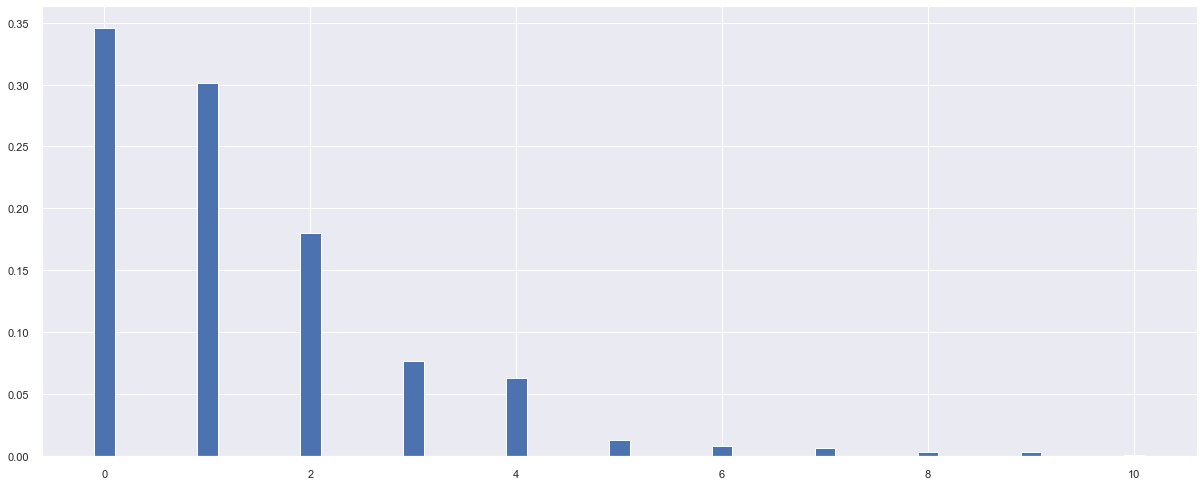

In [433]:
X = np.arange(len(total))
ax = plt.subplot(111)

ax.bar(X, total.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, dogs.values(), width=0.2, color='g', align='center')
ax.bar(X+0.2, cats.values(), width= 0.2, color = 'r', align = 'center')
ax.legend(('Total','Dogs', 'Cats'))
plt.xticks(X, total.keys())
plt.title("Outcome Percentages Council District 1", fontsize=17)
plt.show()

In [346]:
tots = pd.DataFrame.from_dict(total)

In [347]:
tots.head()

,ADOPTION,RETURNED TO OWNER,TRANSFER,EUTHANIZED,FOSTER,DEAD ON ARRIVAL,DIED,TREATMENT,DISPOSAL,OTHER,MISSING
0,0.346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
dogs = c1[c1['Animal Type'] == 'DOG']

In [324]:
dogs.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,Intake Type,Intake Subtype,Intake Total,Reason,Staff Id,Intake Date,Intake Time,Due Out,Intake Condition,Hold Request,Outcome Type,Outcome Subtype,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,A19-195601,1,P9991718,4600,1,STRAY,AT LARGE,1,OTHER,MG1718,2019-10-03,11:08:00,2019-10-03,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-10-03,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,1,P0890077,6900,1,STRAY,AT LARGE,1,OTHRINTAKS,JR,2019-11-08,11:55:00,2019-11-14,APP WNL,RESCU ONLY,RETURNED TO OWNER,WALK IN,2019-11-09,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019
33,A0706302,DOG,DACHSHUND,RECEIVING,IMPOUNDED,A19-197003,1,P9991723,6200,1,STRAY,CONFINED,1,OTHRINTAKS,MW1723,2019-10-15,08:30:00,2019-10-21,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-10-15,08:59:00,NaN,K19-483571,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,OCT.2019
46,A0747126,DOG,SIBERIAN HUSKY,RECEIVING,UNAVAILABLE,A19-199722,1,P9991721,6200,1,STRAY,AT LARGE,1,OTHER,MG1718,2019-11-02,15:24:00,2019-11-02,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,FIELD,2019-11-02,15:25:00,NaN,K19-486006,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,SWEEP,NaN,NOV.2019
57,A0763188,DOG,GERM SHEPHERD,LFD 042,IMPOUNDED,NaN,1,P0905706,4700,1,STRAY,AT LARGE,1,OTHRINTAKS,CDM,2019-10-27,10:55:00,2019-11-02,TREATABLE REHABILITABLE NON-CONTAGIOUS,NaN,RETURNED TO OWNER,WALK IN,2019-10-28,11:37:00,R19-558018,K19-485155,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,OCT.2019


In [292]:
for index, value in a.items():
    c = int(value)/1397
    print(c)

0.3457408732999284
0.3013600572655691
0.1796707229778096
0.07659269863994274
0.06299212598425197
0.012884753042233358
0.007874015748031496
0.006442376521116679
0.002863278453829635
0.002863278453829635
0.0007158196134574087


In [299]:
c?

<AxesSubplot:xlabel='Outcome Type', ylabel='count'>

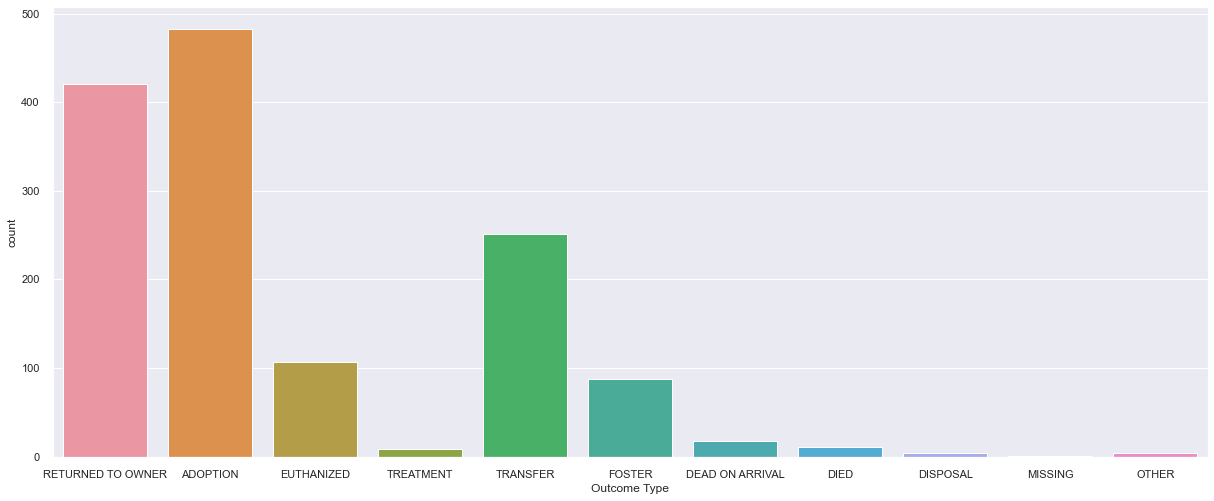

In [245]:
sns.countplot(c1['Outcome Type'])